You learned about managing chat model memory using LangChain, which is crucial for maintaining context in conversations. Here's a recap of the key points:

- __ChatMessageHistory__: This class stores the entire conversation history, allowing the model to access all previous messages. You used methods like .add_ai_message() and .add_user_message() to add messages to the history.
  - ___history = ChatMessageHistory()___
  - ___history.add_ai_message("Hello! Ask me anything about Python programming!")___
  - ___history.add_user_message("What is a list comprehension?")___

- __ConversationBufferMemory__: This class maintains a rolling buffer of the most recent messages, discarding older ones as new messages are added. You defined a buffer memory with a specific size.
    - ___memory = ConversationBufferMemory(size=4)___
    - ___buffer_chain = ConversationChain(llm=chat, memory=memory)___

- __ConversationSummaryMemory__: This class summarizes the conversation over time, retaining key context without storing the entire history. You implemented this by using an additional LLM to generate summaries.
  - ___memory = ConversationSummaryMemory(llm=ChatOpenAI(model_name="gpt-3.5-turbo", openai_api_key=openai_api_key))___
  - __summary_chain = ConversationChain(llm=chat, memory=memory, verbose=True)__

These memory management strategies help optimize the use of context windows and improve the performance of chat models in extended conversations.

#### `Building prompts for sequential chains`
Over the next couple of exercises, you'll work to create a system for helping people learn new skills. This system needs to be built sequentially, so learners can modify plans based on their preferences and constraints. You'll utilize your LangChain LCEL skills to build a sequential chain to build this system, and the first step is to design the __prompt templates__ that will be used by this system.

- Create a __prompt template__ called __learning_prompt__ that takes an input "___activity___" and creates a learning plan.
- Create a __prompt template__ called __learning_prompt__ that takes an input "___learning_plan___" and modifies it to fit within one week.
- _Invoke_ the __learning_prompt__ with an activity of your choice (try "__play golf__" if you're struggling for ideas).

In [ ]:
# # Create a prompt template that takes an input activity
# learning_prompt = PromptTemplate(
#     input_variables=["activity"],
#     template="I want to learn how to {activity}. Can you suggest how I can learn this step-by-step?"
# )

# # Create a prompt template that places a time constraint on the output
# time_prompt = PromptTemplate(
#     input_variables=["learning_plan"],
#     template="I only have one week. Can you create a plan to help me hit this goal: {learning_plan}."
# )

# # Invoke the learning_prompt with an activity
# print(learning_prompt.invoke({"activity": "play golf"}))


#### `Sequential chains with LCEL`
With your prompt templates created, it's time to tie everything together, including the LLM, using chains and LCEL. An __llm__ has already been defined for you that uses OpenAI's __gpt-4o-mini__ model

For the final step of calling the chain, feel free to insert any activity you wish! If you're struggling for ideas, try inputting "play the harmonica".

- Create a __sequential chain__ using ___LCEL___ that passes __learning_prompt__ into the __llm__, and feeds the output into __time_prompt__ for resending to the __llm__.
- Call the chain with the activity of your choice!

In [ ]:
# learning_prompt = PromptTemplate(
#     input_variables=["activity"],
#     template="I want to learn how to {activity}. Can you suggest how I can learn this step-by-step?"
# )

# time_prompt = PromptTemplate(
#     input_variables=["learning_plan"],
#     template="I only have one week. Can you create a plan to help me hit this goal: {learning_plan}."
# )

# # Complete the sequential chain with LCEL
# seq_chain = ({"learning_plan": learning_prompt | llm | StrOutputParser()}
#              | time_prompt
#              | llm
#              | StrOutputParser())

# # Call the chain
# print(seq_chain.invoke({"activity": "Take a course"}))

 Running a series of chains opens up lots of possibility for designing more sophisticated workflows. Now you're beginning to grasp how LangChain can handle more sophisticated workflows, it's time to talk about agents, which enable LLMs to make decisions.

## ReAct agent -> Reason + Act
- agent use LLMs to take the actions

Example: 
A: What is the weather like in Kingston, Jamaica?
- I shoul call Weather() to find the weather in Kingston, Jamaica. 
- Act -> Weather("Kingston", "Jamaica")
- Observe -> The weather is mostly sunny with temperature of 83 F.

In [ ]:
# from langgraph.prebuilt import create_react_agent
# from langchain.agents import load_tools

# llm = ChatOpenAI(model="", api_key="")
# tools = load_tools(["llm-math"], llm=llm)
# agent = create_react_agent(llm, tools)

# mess = agent.invoke({"messages" : [("human", "What is the square root of 101?")]})
# mess

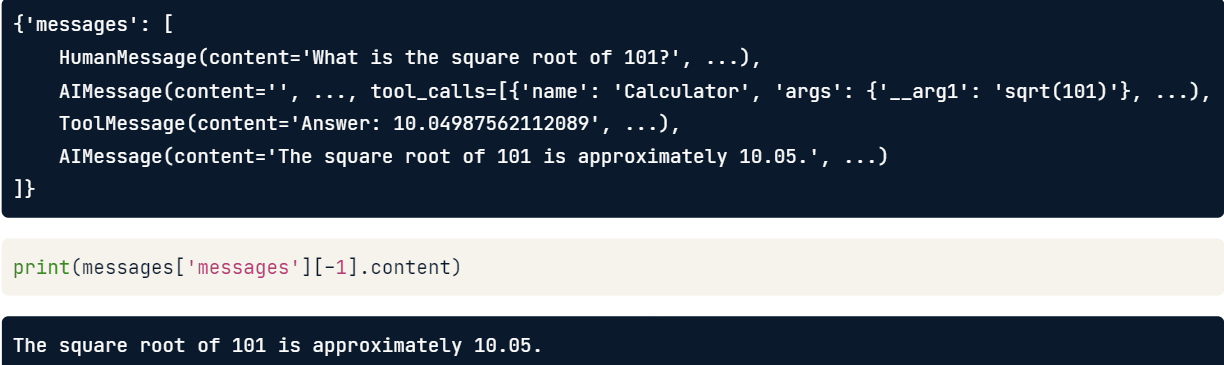

#### `What's an agent?`
Which are the following statements about agents are correct?

- `Agents use language models to make decisions`

- Agents store external data for retrieval

- `Agents use tools to interact with the system in different ways`

- Agents are used to create reusable and customizable prompts

Agents are a fundamental component of so many LangChain applications, as they can be used to create flexible and sophisticated workflows. Head on over to the next exercise to implement a Zero-Shot ReAct agent!